In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

In [3]:
%run ../src/acc_clusters
%run ../src/acc_df

In [4]:
Ac = Acc_data('../data/cleaned/coll_coord.csv')

/Users/franzmornau/g92dsi/capstone/Traffic-Accident-Hotspots-and-Patterns/src/acc_df.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['ds']=X.ds.apply(lambda x: pd.to_datetime(x))


In [5]:
Cy = Ac.get_cyclist_coll()

In [6]:
X = np.array(Cy[['longitude','latitude']])

In [7]:
Accl = DBSCAN(eps=0.001, min_samples=5).fit(X)

DBSCAN(algorithm='auto', eps=0.001, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [7]:
l = Accl.labels_
len(np.unique(l))

190

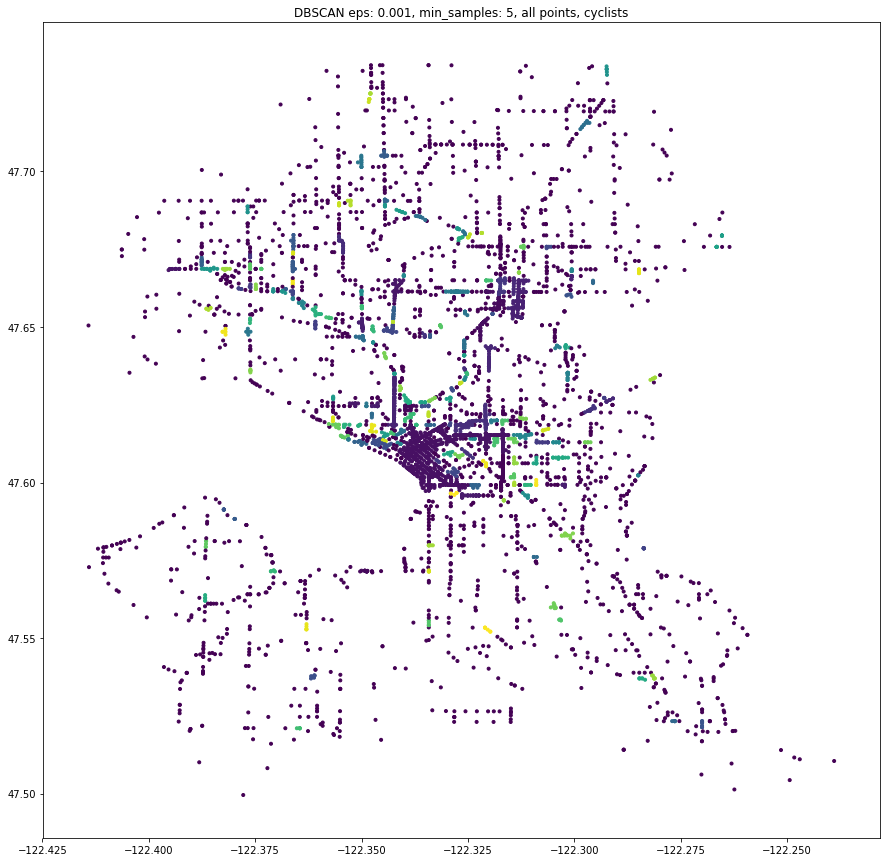

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(X[:,0],X[:,1],c=l,marker='.')

plt.title('DBSCAN eps: 0.001, min_samples: 5, all points, cyclists')
plt.savefig('../images_part2/dbscan_001_5_ap_cy.png')

In [9]:
l_c = l[l!=-1]
len(np.unique(l_c))

189

In [10]:
x_c=X[l!=-1,:]

In [11]:
len(x_c)

3208

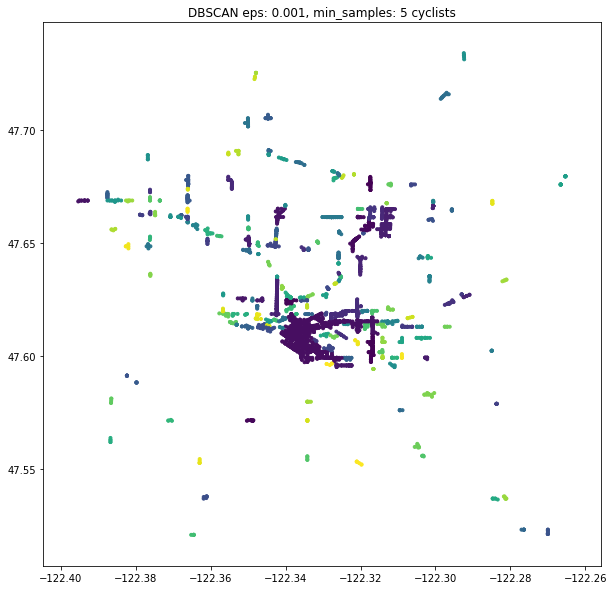

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_c[:,0],x_c[:,1],c=l_c, marker='.')

plt.title('DBSCAN eps: 0.001, min_samples: 5 cyclists')
plt.savefig('../images_part2/dbscan_001_5_cy.png')

#### Now these look more interesting!

----------------

In [13]:
sample_min = 10
x = np.arange(0.001,0.0001,-0.000001)
len(x)

900

In [16]:
mcl = [Ac_cluster(Cy, 30000, eps=eps, min_samples=sample_min) for eps in x]

In [17]:
cl_counts = [mc.cluster_counts['point'].sum() for mc in mcl]

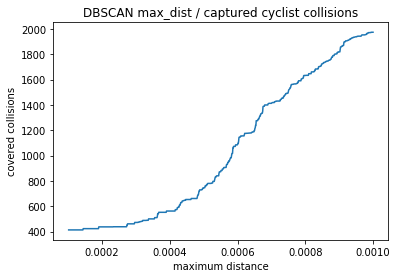

In [18]:
plt.plot(x,cl_counts)
plt.xlabel("maximum distance")
plt.ylabel("covered collisions")
plt.title('DBSCAN max_dist / captured cyclist collisions')
plt.savefig('../images_part2/dbscan_dist_var_coll_cy.png')

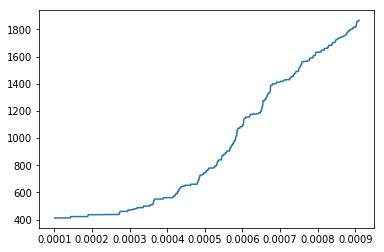

In [131]:
plt.plot(x[90:],cl_counts[90:])

## Now let's look into the number of clusters:

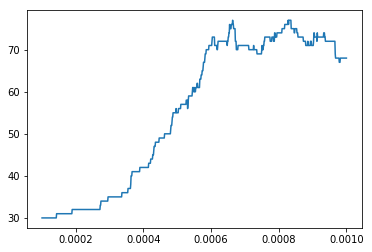

In [132]:
cl_nrs = [len(mc.cluster_counts) for mc in mcl]
plt.plot(x,cl_nrs)

#### Let's see where the local minimum is:

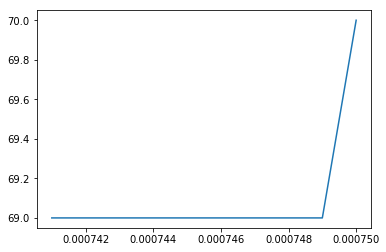

In [133]:
cl_nrs = [len(mc.cluster_counts) for mc in mcl]
plt.plot(x[250:260],cl_nrs[250:260])

In [134]:
len(cl_nrs)

900

------------

In [135]:
xs, ys = mcl[260].get_clusters_head(100)

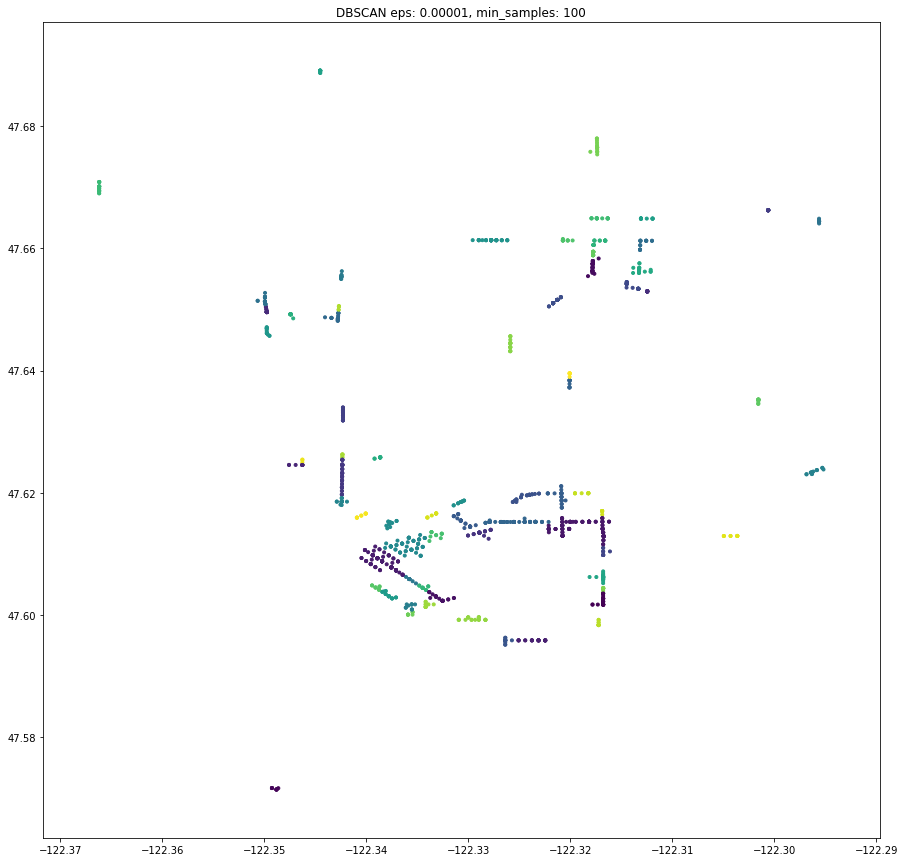

In [136]:

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(xs[:,0],xs[:,1],c=ys,marker='.')

plt.title('DBSCAN eps: 0.00001, min_samples: 100')
plt.savefig('../images_part2/dbscan_000742_96_cy.png')

In [137]:
len(mcl[260].cluster_counts)

69

In [138]:
mcl[260].cluster_counts.head()

,point
cluster,
4,116
5,116
22,87
32,59
11,57


In [140]:
xs[y==4][:3]

array([[-122.32076238,   47.61296336],
       [-122.32080787,   47.61581795],
       [-122.32040943,   47.61523807]])

#### now the next local max:

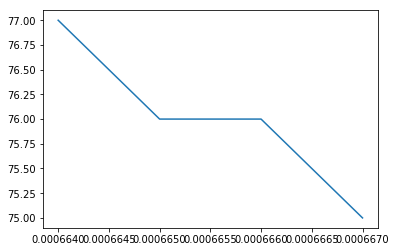

In [151]:
cl_nrs = [len(mc.cluster_counts) for mc in mcl]
plt.plot(x[333:337],cl_nrs[333:337])

In [152]:
xs, ys = mcl[260].get_clusters_head(100)

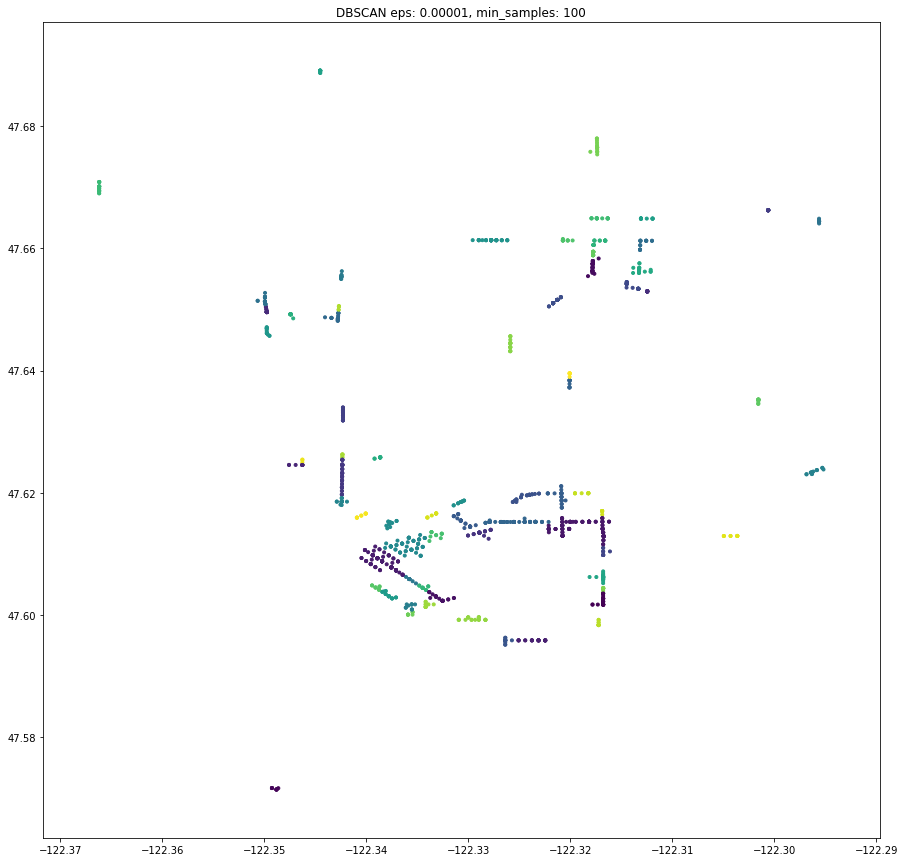

In [153]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(xs[:,0],xs[:,1],c=ys,marker='.')

plt.title('DBSCAN eps: 0.00001, min_samples: 100')
plt.savefig('../images_part2/dbscan_000664_77_cy.png')

In [154]:
mcl[337].cluster_counts.head()

,point
cluster,
21,87
8,63
12,42
3,32
33,32


### Distance
At a latidude of 47 degrees, a difference in coordinates of 0.0001 represents a distance of 12m. 

(See https://gps-coordinates.org/distance-between-coordinates.php )

We can certainly assume that everything closer than 6m is
the same adress.

Consistent with this, we see in our data: Below a distance of 0.00005, every cluster represents one point on the coordinate map (one adress). - We don't know how the coordinates were elicited, but our guess is that in most cases they were derived from the address.

To confirm:
- look if the adresses for these "minimal spatial clusters" are also the same
- look if "same address" <=> "same coordinates"
- Are there cases where there is no adress given, but coordinates? (The other way round, there are cases in the filtered-out data with no coordinates)

To add:
- see how many clusters of identical adresses exist in the data (for sample_min less than 100)
- there could be time patters in there (identical adresses with less than 100 cases, but clustered in time. Reasons could be temporary construction sites, or city interventions on places that had collision clustering in a year, e.g *followig* a new construction.)